# Shubham Sharma
# DATA SCIENCE & BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION
# Dataset: (http://bit.ly/w-data)
# TASK -1 Prediction using Supervised ML
Hey everyone! This is a Simple Linear Regression project in which i have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

This video will guide you through the process of retrieving answers to all these questions.

Let us get started!

# Importing libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
# Now reading the data from the link provided
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


# Data Preprocessing

In [3]:
# Before doing any task on the data our first aim to understand the data.
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Finding any missing value in the data
print(data.isna().sum())
print("\nSince the sum of all the cells of Hours and Scores is zero so we can say that we don't have any misssing value in our dataset.")

Hours     0
Scores    0
dtype: int64

Since the sum of all the cells of Hours and Scores is zero so we can say that we don't have any misssing value in our dataset.


Now we plot our data points on graph to see if we can find any relationship between the data.

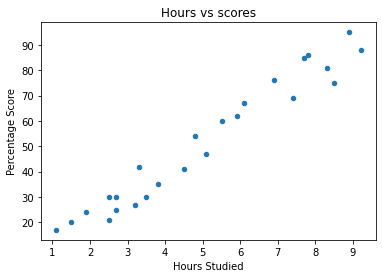

In [5]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours vs scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:xlabel='Hours'>

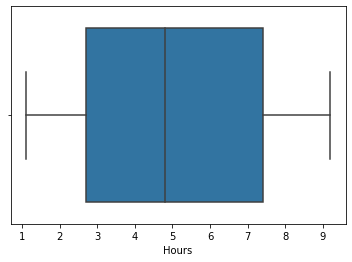

In [6]:
# Outlier detection 
sns.boxplot(data['Hours'])

Here we can see we don't have any outliers to remove so we proceed to our next steps.

In [7]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=6,train_size=.80) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Training the data

In [10]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

In [11]:
print(my_model.coef_)
print(my_model.intercept_)

[10.05312869]
1.3923258559622198


In [12]:
y_pred=my_model.predict(X_test)
y_pred

array([39.59421488, 56.68453365, 16.47201889, 93.8811098 , 84.83329398])

# Plotting the regression line

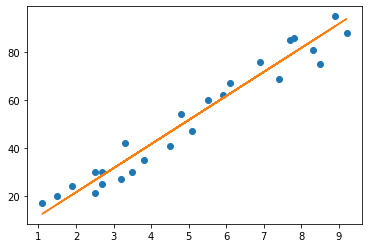

In [13]:
plt.plot(x, y, 'o')
plt.plot(x, my_model.coef_*x + my_model.intercept_)

In [14]:
# Comparing Actual vs Predicted scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


In [15]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
pred = my_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.38376623376621


# Evaluating coefficient's statistical significance

In [16]:
import statsmodels.formula.api as smf

my_stat_model = smf.ols(formula='Scores ~ Hours', data=data).fit()
#confidence interval
my_stat_model.conf_int()

,0,1
Intercept,-2.753470,7.720817
Hours,8.838823,10.712784


In [17]:
# Now we have the coefficient then now find the p_value of the coefficient
print(my_stat_model.pvalues)
print()
# how to check that
print(my_stat_model.pvalues.loc['Hours'] < .05)

Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64

True


In [18]:
my_stat_model.rsquared

0.9529481969048356

Since our rsquared value is close to 1 we can say that our model is predicting well on the test data.

In [19]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        10:38:16   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluating the model

This step is important to compare how well our algorithm performing on a particular dataset. Here, I'm using MAE, MSE and RMSE. There are many such metrics.


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.230413223140487
Mean squared Error: 18.7654746734428
Root mean squared Error: 4.331913511768534
